<a href="https://colab.research.google.com/github/ndeleonardis/DataSetNoeliaDeLeonardis/blob/main/dataset_noelia_de_leonardis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Housing Price Dataset

Data set con tendencia de precios de propiedades en función de características básicas tales como  (superficie, cantidad de habitaciones etc) y ubicación geográfica.
En primer lugar lo que hice fue traducir los nombres de columnas y ver los datos para mejorar el entendimiento del negocio si bien es sencillo no esta demás.  Luego ejecute varios comandos básicos de la librería pd pada ver resumen de datos y mejorar tambien el entendimiento.

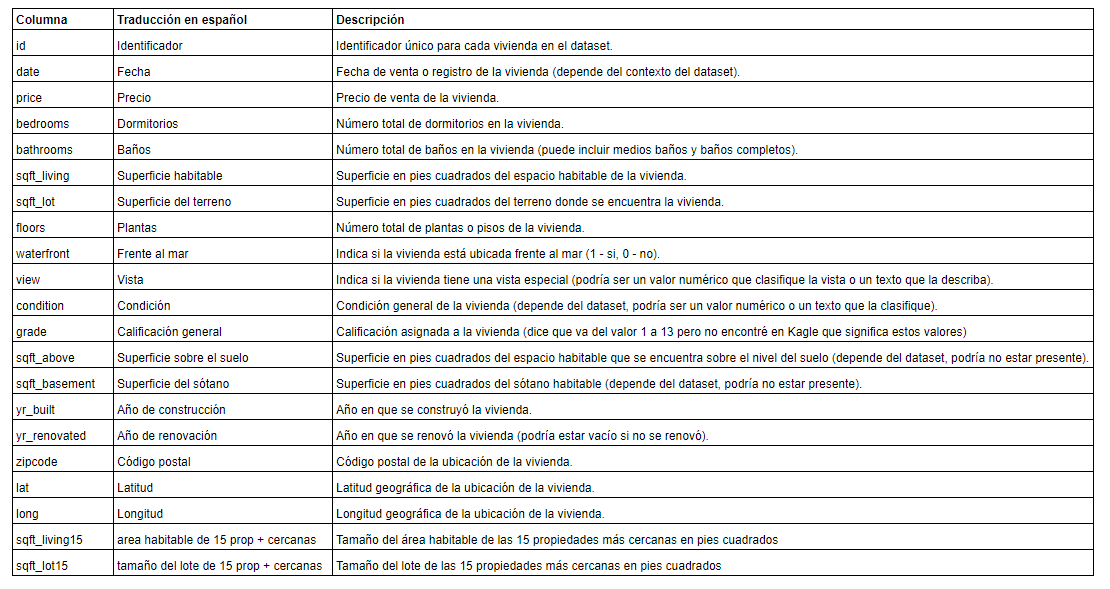


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Cargamaos el archivo usamos URL cruda del archivo CSV que esta en nuestro GitHub
url = 'https://raw.githubusercontent.com/ndeleonardis/DataSetNoeliaDeLeonardis/main/Housing.csv'

# Cargar el archivo CSV en un DataFrame de Pandas
try:
    df = pd.read_csv(url)
    print("El archivo CSV se ha cargado exitosamente.")
except Exception as e:
    print("Se produjo un error al cargar el archivo CSV:", e)

ModuleNotFoundError: No module named 'stylize'

In [ ]:
#Vemos por pantalla los datos del dataset importado
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7229300521,20141013T000000,231300.0,2,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
# Utilizamos el comando describe () para ver valores estadisticos como la media, valor mínimo, valor máximo etc. Al comando le aplique un formato de estilo ya que
#lo mostraba en notacion exponencial/cientifica y me dificultaba leerlo.
#df.describe ()
descripcion = df.describe().style.format("{:.2f}")
display(descripcion)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00
mean,4580306147.71,540088.58,3.37,2.11,2079.90,15106.97,1.49,0.01,0.23,3.41,7.66,1788.39,291.51,1971.01,84.40,98077.94,47.56,-122.21,1986.55,12768.46
std,2876569751.89,367126.83,0.93,0.77,918.44,41420.51,0.54,0.09,0.77,0.65,1.18,828.09,442.58,29.37,401.68,53.51,0.14,0.14,685.39,27304.18
min,1000102.00,75000.00,0.00,0.00,290.00,520.00,1.00,0.00,0.00,1.00,1.00,290.00,0.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2123049194.00,321950.00,3.00,1.75,1427.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,0.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,3904930410.00,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,0.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,7308900445.00,645000.00,4.00,2.50,2550.00,10688.00,2.00,0.00,0.00,4.00,8.00,2210.00,560.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,9900000190.00,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,4820.00,2015.00,2015.00,98199.00,47.78,-121.31,6210.00,871200.00


Luego de haber ejecutado este comando describe para obtener las medidas estadísticas principales hay varias cosas que veo que me hacen ruido que paso a detallar:


1. **bedrooms -->** que una propiedad tenga 33 habitaciones es exorbitante cuando la media es 3.370795. En el dataset no encontre una tipificacion de la vivienda como por ejemplo casa / duplex / hotel / galpon cosas de ese estilo. Si estuviera en un trabajo formal buscaría el porque de ese valor a fin de ver si no fue error es basura o que.
2. **bathrooms	-->** el campo se describe como float64 lo cual no tiene sentido o tiene baño o no tiene. Tampoco entiendo porque por ejemplo dice 2,5. Idem que lo que puse en campo anterior buscaria el porque.



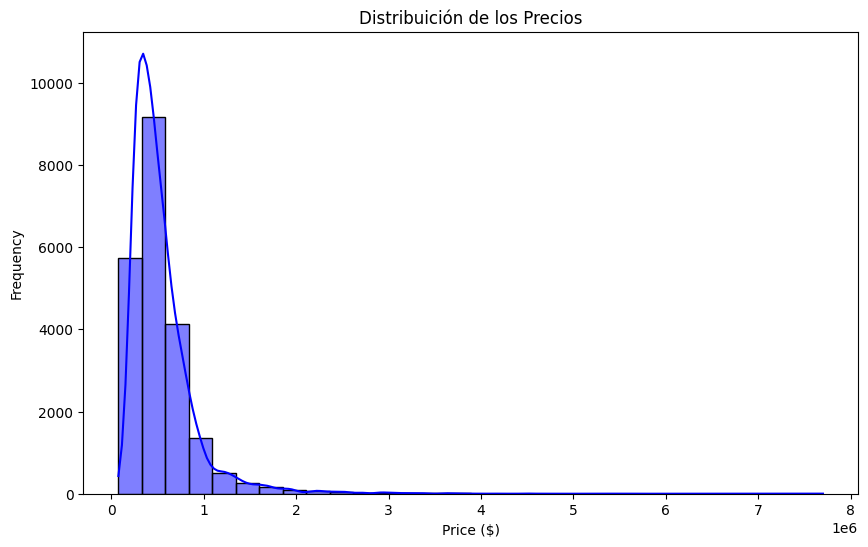

In [ ]:
# Visualización 1: Distribuición de los Precios
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=30, color='blue', kde=True)
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.title('Distribuición de los Precios')
plt.show()